# Serie RCL-kreds med sinus-output

In [2]:
#Parker importeres:
import numpy as np
import matplotlib.pyplot as plt

#Målte værdier:
Induktans = 40.9 * 10**(-3) #Henry
Kapacitans = 46.5 * 10**(-9) #Farad
Modstand = 33.6 #Ohm

Q = np.sqrt( Induktans / (Kapacitans * Modstand**2 ))
w_max = 1 / np.sqrt(Induktans * Kapacitans)
w_max

22930.412612811622

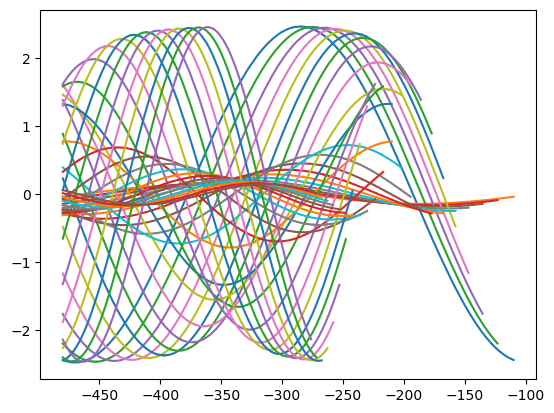

In [9]:
#Der laves en liste til faseforskydningerne:
Faseforskydning = []
Amplitude_A = []
Amplitude_B = []

#Frekvenserne der er målt ved:
frek = np.array([27 , 28 , 29 , 30 , 31 , 32 , 33 , 34 , 35 , 36 , 37 , 38 , 39 , 40 ,41 , 42 , 43 , 44 , 45 , 46 , 47 , 48 ,49])*100

#Der gennemgås datasættes for hver eneste frekvens:
for Hz in frek[0:7]:
    Rådata = np.genfromtxt(f"{Hz}Hz.csv" , delimiter=',' , skip_header=2)
    
    #Dataet defineres i seperate mapper:
    Tid = Rådata[:,0]
    CA = Rådata[:,1]
    CB = Rådata[:,2] * 10**(-3)

    #Periden og det totale antal af svinginger findes:
    Periode = 1 / Hz * 10**6
    Antal_svingninger = (Tid[-1]-Tid[0]) / Periode

    #Der laves en liste seperat til kanal A og B:
    SvingA = []
    SvingB = []
    #Der loopes over det totale antal af svingninger:
    for i in range(0,int(Antal_svingninger)):
        #Der laves en maske til at opdele bølgerne i de enkelte perioder:
        Maske = (Tid[0] + Periode * i <Tid) & (Tid[0]+ Periode * (i+1) >Tid)
        
        #Der laves en seperat liste til dataet indenfor hver periode
        xx = Tid[Maske]
        yyA = CA[Maske]
        yyB = CB[Maske]

        #Hver enkelt svingning for de to kanaler A og B gemmes i seperate lister:
        SvingA.append([xx,yyA])
        SvingB.append([xx,yyB])
    #Der plottes bare for se, om det ser okay ud:
    plt.plot(*SvingA[0])
    plt.plot(*SvingB[0])


    #Der findes nu faseforskydningen mellem kanal A og B for hver periode:
    Amp_A = []
    Amp_B = []
    For = []
    for x in range(0,int(Antal_svingninger)):
        For.append(  ( 2*np.pi / Periode * (Tid[ np.where(yyA == np.max(yyA))[0][0] ] - Tid[ np.where(yyB == np.max(yyB))[0][0] ] )  ) )
        Amp_B.append(np.max(SvingB[x][1]))
        Amp_A.append(np.max(SvingA[x][1]))


    #Frekvensen, den gennemsnitlige faseforskygning og den statistiske usikkerhed gemmes i en seperat liste:
    Faseforskydning.append([Hz , np.mean(For) , np.std(For)])
    Amplitude_B.append([Hz , np.mean(Amp_B) , np.std(Amp_B)])
    Amplitude_A.append([Hz , np.mean(Amp_A) , np.std(Amp_A)])

#Der gennemgås datasættes for hver eneste frekvens:
for Hz in frek[7:]:
    Rådata = np.genfromtxt(f"{Hz}Hz.csv" , delimiter=',' , skip_header=2)
    
    #Dataet defineres i seperate mapper:
    Tid = Rådata[:,0]
    CA = Rådata[:,1]
    CB = Rådata[:,2]

    #Periden og det totale antal af svinginger findes:
    Periode = 1 / Hz * 10**6
    Antal_svingninger = (Tid[-1]-Tid[0]) / Periode

    #Der laves en liste seperat til kanal A og B:
    SvingA = []
    SvingB = []
    #Der loopes over det totale antal af svingninger:
    for i in range(0,int(Antal_svingninger)):
        #Der laves en maske til at opdele bølgerne i de enkelte perioder:
        Maske = (Tid[0] + Periode * i <Tid) & (Tid[0]+ Periode * (i+1) >Tid)
        
        #Der laves en seperat liste til dataet indenfor hver periode
        xx = Tid[Maske]
        yyA = CA[Maske]
        yyB = CB[Maske]

        #Hver enkelt svingning for de to kanaler A og B gemmes i seperate lister:
        SvingA.append([xx,yyA])
        SvingB.append([xx,yyB])
    #Der plottes bare for se, om det ser okay ud:
    plt.plot(*SvingA[0])
    plt.plot(*SvingB[0])


    #Der findes nu faseforskydningen mellem kanal A og B for hver periode:
    Amp_A = []
    Amp_B = []
    For = []
    for x in range(0,int(Antal_svingninger)):
        For.append(  ( 2*np.pi / Periode * (Tid[ np.where(yyA == np.max(yyA))[0][0] ] - Tid[ np.where(yyB == np.max(yyB))[0][0] ] )  ) )
        Amp_B.append(np.max(SvingB[x][1]))
        Amp_A.append(np.max(SvingA[x][1]))


    #Frekvensen, den gennemsnitlige faseforskygning og den statistiske usikkerhed gemmes i en seperat liste:
    Faseforskydning.append([Hz , np.mean(For) , np.std(For)])
    Amplitude_B.append([Hz , np.mean(Amp_B) , np.std(Amp_B)])
    Amplitude_A.append([Hz , np.mean(Amp_A) , np.std(Amp_A)])

### Amplitudeforhold

In [55]:
def func_amplitudeforhold(w):
    return 1 / np.sqrt( 1 + Q**2 * ( w  - (1 / w) )**2 )

xx = np.linspace(0,1 * 10**(6),10000) / (2*np.pi*w_max)
yy = func_amplitudeforhold(xx)


C:\Users\chris\AppData\Local\Temp\ipykernel_7912\1089425506.py:2: RuntimeWarning: divide by zero encountered in divide
  return 1 / np.sqrt( 1 + Q**2 * ( w  - (1 / w) )**2 )


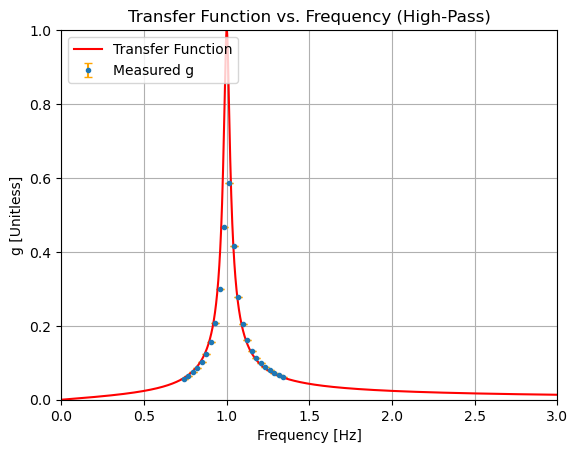

In [66]:
x = []
y = []
u = []


for k in range(len(Amplitude_B)):
    x.append(Amplitude_A[k][0] * 2* np.pi / w_max  )
    y.append(Amplitude_B[k][1]/Amplitude_A[k][1])
    u.append(0)

plt.errorbar(x,y,u , fmt='.' , label='Measured g' , ecolor='orange' , capsize=3)
plt.plot(xx,yy, label = 'Transfer Function', color='red')
plt.legend(loc='upper left',fontsize = 10)
plt.xlabel('Frequency [Hz]', fontsize = 10)
plt.title(f'Transfer Function vs. Frequency (High-Pass)')
plt.ylabel('g [Unitless]', fontsize = 10);
plt.xlim(0,3)
plt.ylim(0,1)
plt.grid()


In [ ]:
p

[[2700, 2.4662005, 0.00015249999999999986], [2800, 2.4592575, 0.0003815000000000346], [2900, 2.447508, 0.0005340000000000344], [3000, 2.4305446666666666, 0.00019037915385417502], [3100, 2.406333666666667, 0.00025959241557150815], [3200, 2.365286333333333, 0.0003807583077081917], [3300, 2.297687333333333, 0.0003596816493635898], [3400, 2.173680666666667, 0.00021590327052232525], [3500, 1.9375693333333333, 0.00019037915385417502], [3600, 1.5472376666666667, 0.00031352015706944623], [3700, 1.3294373333333334, 0.00014377837884126454], [3800, 1.6531366666666667, 0.00047173250423899966], [3900, 1.986246666666667, 0.0005036283903390615], [4000, 2.17764825, 0.00028516782339525824], [4100, 2.2827842499999997, 0.00028543508456391713], [4200, 2.34405025, 0.0007196590772718767], [4300, 2.381054, 0.0004579999999998474], [4400, 2.40569775, 0.0005117242299325209], [4500, 2.4232457500000004, 0.00063398200881404], [4600, 2.4349577499999997, 0.00036378109832701464], [4700, 2.44396025, 0.0002256140232787

### Faseforskydning

In [68]:
def func_faseforskydning(w):
    return -np.arctan(Q * (w - 1 / w))

y_fase = func_faseforskydning(xx) / np.pi


C:\Users\chris\AppData\Local\Temp\ipykernel_7912\2727954776.py:2: RuntimeWarning: divide by zero encountered in divide
  return -np.arctan(Q * (w - 1 / w))


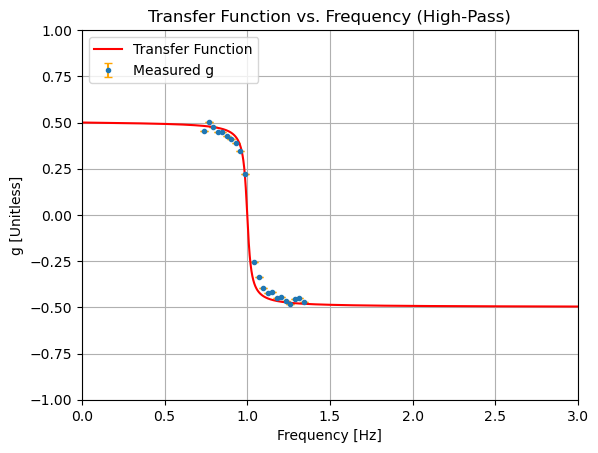

In [74]:
x = []
y = []
u = []


for k in range(len(Amplitude_B)):
    x.append(Faseforskydning[k][0] * 2* np.pi / w_max)
    y.append(Faseforskydning[k][1] / np.pi  )
    u.append(0)

plt.errorbar(x,y,u , fmt='.' , label='Measured g' , ecolor='orange' , capsize=3)
plt.plot(xx,y_fase, label = 'Transfer Function', color='red')
plt.legend(loc='upper left',fontsize = 10)
plt.xlabel('Frequency [Hz]', fontsize = 10)
plt.title(f'Transfer Function vs. Frequency (High-Pass)')
plt.ylabel('g [Unitless]', fontsize = 10);
plt.xlim(0,3)
plt.ylim(-1,1)
plt.grid()